In [1]:
%matplotlib inline

In [2]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
import pydot
matplotlib.style.use('ggplot')

In [80]:
WEIGHT = 'weight'
COST = 'cost'

NEWARK = 'Newark'
WOODBRIDGE = 'Woodbridge'
TRENTON = 'Trenton'
ASBURY_PARK = 'Asbury Park'
CAMDEN = 'Camden'
ATLANTIC_CITY = 'Atlantic City'
CAPE_MAY = 'Cape May'

NEW_JERSEY_DATA = {NEWARK: {WOODBRIDGE: {WEIGHT: 20, COST: 0.60}},
                 WOODBRIDGE: {TRENTON: {WEIGHT: 42, COST: 1.00}, 
                             ASBURY_PARK: {WEIGHT: 35, COST: 0.75},
                             CAMDEN: {WEIGHT: 60, COST: 0.00}},
                 TRENTON: {ASBURY_PARK: {WEIGHT: 40, COST: 0.00},
                          CAMDEN: {WEIGHT: 30, COST: 0.70}},
                 ASBURY_PARK: {ATLANTIC_CITY: {WEIGHT: 75, COST: 1.35}},
                 CAMDEN: {ATLANTIC_CITY: {WEIGHT: 55, COST: 1.25},
                         CAPE_MAY: {WEIGHT: 85, COST: 0.00}},
                 ATLANTIC_CITY: {CAPE_MAY: {WEIGHT: 45, COST: 0.75}}
                }

new_jersey_graph = nx.from_dict_of_dicts(NEW_JERSEY_DATA)

from collections import defaultdict
edge_labels = {}

for e in new_jersey_graph.edges_iter():
    data = new_jersey_graph.get_edge_data(*e)
    edge_labels[e] = '{weight}km // ${cost:.2f}'.format(weight=data[WEIGHT], cost=data[COST])

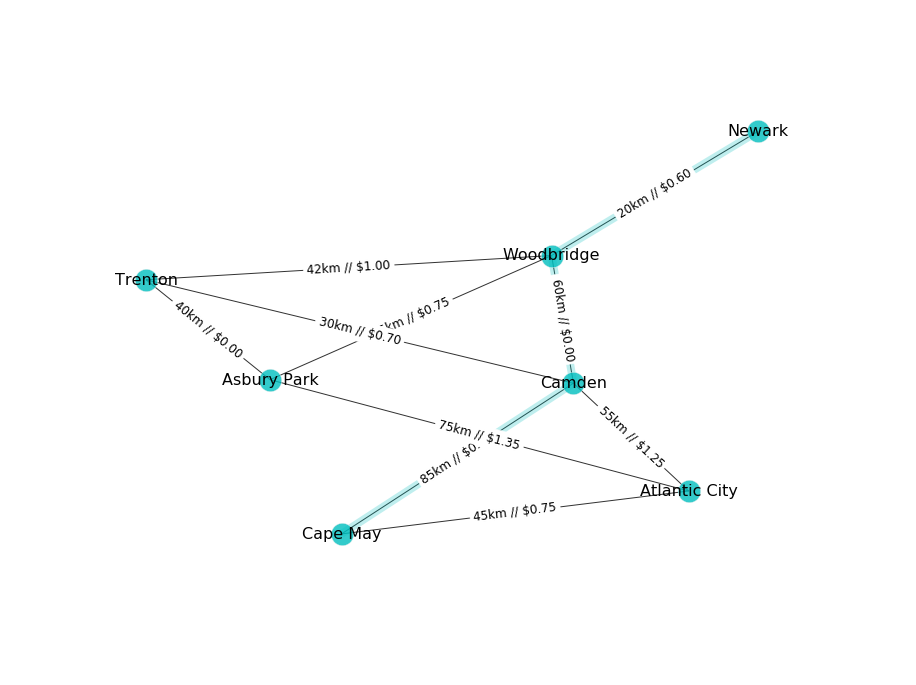

In [109]:
DIJKSTRA_EDGES = [(NEWARK, WOODBRIDGE), (WOODBRIDGE, CAMDEN), (CAMDEN, CAPE_MAY)]

plt.figure(figsize=(12, 9))
layout = nx.drawing.nx_pydot.graphviz_layout(new_jersey_graph, k=2)
nx.draw(new_jersey_graph, layout, with_labels=True, node_color='c', alpha=0.8, node_size=500, font_size=16)
nx.draw_networkx_edge_labels(new_jersey_graph, layout, edge_labels, font_size=12)
nx.draw_networkx_edges(new_jersey_graph , layout,
                       edgelist=DIJKSTRA_EDGES, width=8, alpha=0.25, edge_color='c')


In [5]:
"""An OOP wrapper of Python's built-in heapq - a min heap
"""

import heapq


class MinHeap(object):
    def __init__(self, data=None):
        if data is not None:
            self.heap = heapq.heapify(data)

        else:
            self.heap = []

    def push(self, item):
        heapq.heappush(self.heap, item)

    def pop(self):
        return heapq.heappop(self.heap)

    def push_pop(self, item):
        return heapq.heappushpop(self.heap, item)

    def n_smallest(self, n):
        return heapq.nsmallest(n, self.heap)

    def n_largest(self, n):
        return heapq.nsmallest(n, self.heap)

    def peek(self):
        return self.heap[0]

    def heapify(self):
        heapq.heapify(self.heap)

    def __len__(self):
        return len(self.heap)

    def __str__(self):
        return str(self.heap)

    def __getitem__(self, item):
        return self.heap.__getitem__(item)


In [164]:
def dijkstra(graph, start, finish, cost_function):
    frontier = MinHeap()
    frontier.push((start, 0))
    came_from = {start: (None, 0)}
    checked_edges = set()

    while len(frontier):
        current, current_cost = frontier.pop()

        if current == finish:
            path = [current]
            while current != start:
                current = came_from[current][0]
                path.append(current)
            path.reverse()
            return path, current_cost

        neighbors = graph.neighbors(current)

        for neighbor in neighbors:
            # sorting to be agnostic of order, as graph is undirected
            edge = tuple(sorted((current, neighbor))) 
            if edge in checked_edges:
                continue
            else:
                checked_edges.add(edge)
            
            neighbor_cost = current_cost + cost_function(graph.get_edge_data(current, neighbor))
            
            # Visited before, and new cost higher than old cost:
            if neighbor in came_from and neighbor_cost >= came_from[neighbor][1]:
                continue
            
            came_from[neighbor] = (current, neighbor_cost)
            frontier.push((neighbor, neighbor_cost))

    return None

def distance_cost_function(data_dict):
    return data_dict[WEIGHT]

def price_cost_function(data_dict):
    return data_dict[COST]

def combined_cost_function_generator(cost_per_kilometer):
    def cost_function(data_dict):
        return data_dict[WEIGHT] * cost_per_kilometer + data_dict[COST]
    
    return cost_function

In [104]:
print dijkstra(new_jersey_graph, NEWARK, CAMDEN, distance_cost_function)
print dijkstra(new_jersey_graph, NEWARK, CAPE_MAY, distance_cost_function)

print dijkstra(new_jersey_graph, NEWARK, CAMDEN, price_cost_function)
print dijkstra(new_jersey_graph, NEWARK, CAPE_MAY, price_cost_function)

cost_per_kilometer = 0.05
cost_func = combined_cost_function_generator(cost_per_kilometer)

['Newark', 'Woodbridge', 'Camden']
['Newark', 'Woodbridge', 'Camden', 'Cape May']
['Newark', 'Woodbridge', 'Camden']
['Newark', 'Woodbridge', 'Camden', 'Cape May']


In [105]:
print nx.dijkstra_path(new_jersey_graph, NEWARK, CAMDEN)
print nx.dijkstra_path(new_jersey_graph, NEWARK, CAPE_MAY)
print nx.dijkstra_path(new_jersey_graph, NEWARK, CAMDEN, weight=COST)
print nx.dijkstra_path(new_jersey_graph, NEWARK, CAPE_MAY, weight=COST)


['Newark', 'Woodbridge', 'Camden']
['Newark', 'Woodbridge', 'Camden', 'Cape May']
['Newark', 'Woodbridge', 'Camden']
['Newark', 'Woodbridge', 'Camden', 'Cape May']


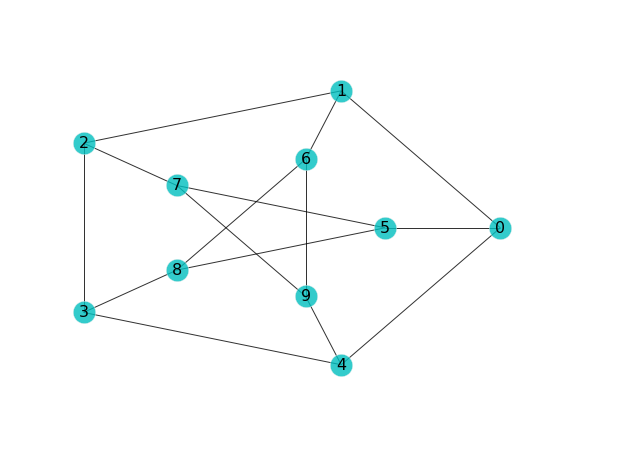

In [121]:
petersen = nx.petersen_graph()
PETERSEN_INSIDE_NODES = range(5,10)
PETERSEN_OUTSIDE_NOTES = range(5)

plt.figure(figsize=(8, 6))
petersen_layout = nx.shell_layout(petersen, nlist=[PETERSEN_INSIDE_NODES, PETERSEN_OUTSIDE_NOTES])
nx.draw(petersen, petersen_layout, with_labels=True, node_color='c', alpha=0.8, node_size=500, font_size=16)


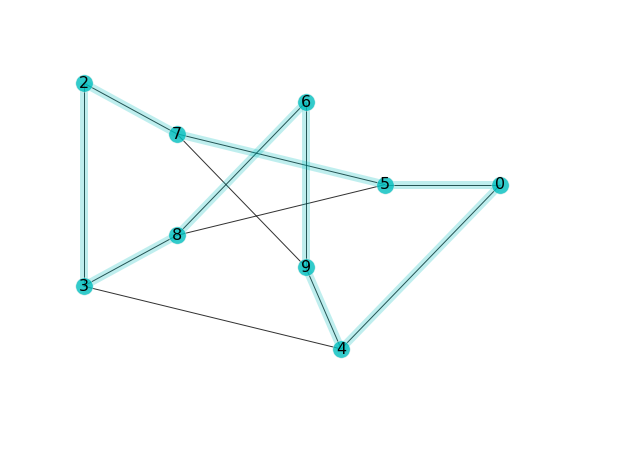

In [120]:
external_removed_petersen = nx.petersen_graph()
external_removed_petersen.remove_node(1)

EXTERNAL_REMOVED_HAMILTONIAN_EDGES = [(0, 4), (4, 9), (9, 6), (6, 8), (8, 3), (3, 2), (2, 7), (7, 5), (5, 0)]

plt.figure(figsize=(8, 6))
external_removed_layout = nx.shell_layout(external_removed_petersen, 
                                          nlist=[PETERSEN_INSIDE_NODES, PETERSEN_OUTSIDE_NOTES])
nx.draw(external_removed_petersen, external_removed_layout, 
        with_labels=True, node_color='c', alpha=0.8, font_size=16)
nx.draw_networkx_edges(external_removed_petersen , external_removed_layout,
                       edgelist=EXTERNAL_REMOVED_HAMILTONIAN_EDGES, width=8, alpha=0.25, edge_color='c')

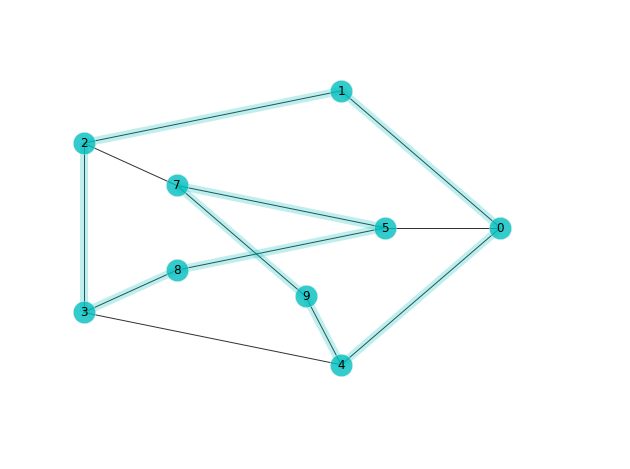

In [119]:
internal_removed_petersen = nx.petersen_graph()
internal_removed_petersen.remove_node(6)

INTERNAL_REMOVED_HAMILTONIAN_EDGES = [(2, 1), (1, 0), (0, 4), (4, 9), (9, 7), (7, 5), (5, 8), (8, 3), (3, 2)]

plt.figure(figsize=(8, 6))
internal_removed_layout = nx.shell_layout(internal_removed_petersen, 
                                          nlist=[PETERSEN_INSIDE_NODES, PETERSEN_OUTSIDE_NOTES])
nx.draw(internal_removed_petersen, internal_removed_layout, 
        with_labels=True, node_color='c', alpha=0.8, node_size=500)
nx.draw_networkx_edges(internal_removed_petersen , internal_removed_layout,
                       edgelist=INTERNAL_REMOVED_HAMILTONIAN_EDGES, width=8, alpha=0.25, edge_color='c')

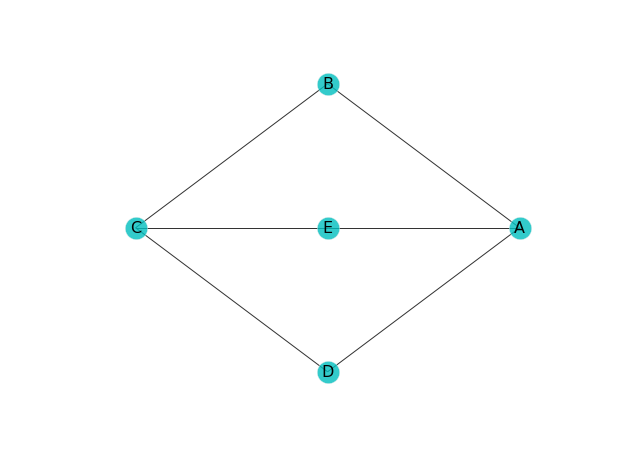

In [118]:
SQUARE_WITH_MIDDLE = {'A': ['B', 'D', 'E'],
                     'B': ['C'],
                     'C': ['D', 'E']}

square = nx.from_dict_of_lists(SQUARE_WITH_MIDDLE)
plt.figure(figsize=(8, 6))
square_layout = nx.shell_layout(square, nlist=[['E'], ['A', 'B', 'C', 'D']])
nx.draw(square, square_layout, with_labels=True, node_color='c', alpha=0.8, node_size=500, font_size=16)


{('A', 'B'): <matplotlib.text.Text at 0x1164a3650>,
 ('A', 'C'): <matplotlib.text.Text at 0x1164bd550>,
 ('C', 'B'): <matplotlib.text.Text at 0x1164b1f50>}

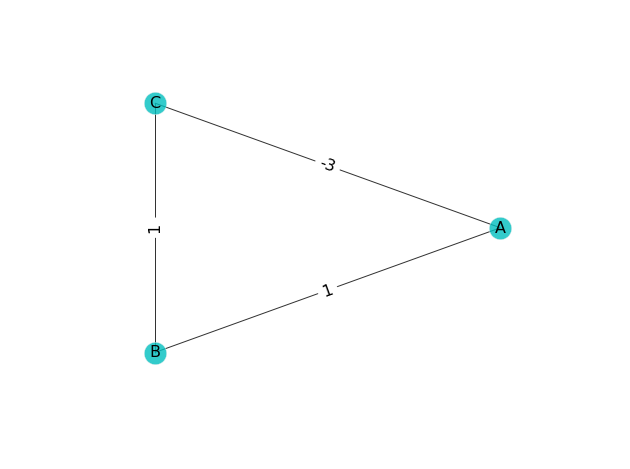

In [117]:
TRIVIAL_NEGATIVE_CIRCUIT = {'A': {'B' : {WEIGHT: 1}, 'C': {WEIGHT: -3}},
                           'B': {'C': {WEIGHT: 1}}}

negative_circuit_triangle = nx.from_dict_of_dicts(TRIVIAL_NEGATIVE_CIRCUIT)

nct_edge_labels = {}

for e in negative_circuit_triangle.edges_iter():
    data = negative_circuit_triangle.get_edge_data(*e)
    nct_edge_labels[e] = '{weight}'.format(weight=data[WEIGHT])
    
plt.figure(figsize=(8, 6))
nct_layout = nx.circular_layout(negative_circuit_triangle)
nx.draw(negative_circuit_triangle, nct_layout, with_labels=True, 
        node_color='c', alpha=0.8, node_size=500, font_size=16)
nx.draw_networkx_edge_labels(negative_circuit_triangle, nct_layout, nct_edge_labels, font_size=16)

{('A', 'B'): <matplotlib.text.Text at 0x1162c24d0>,
 ('A', 'C'): <matplotlib.text.Text at 0x1162cea50>,
 ('C', 'B'): <matplotlib.text.Text at 0x1162ce490>}

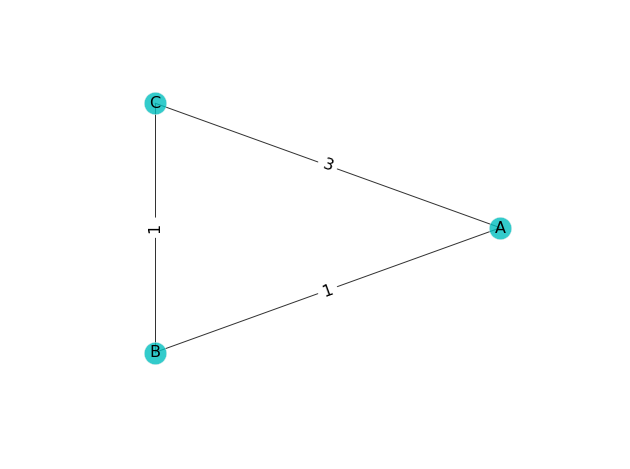

In [116]:
TRIVIAL_HEAVY_CIRCUIT = {'A': {'B' : {WEIGHT: 1}, 'C': {WEIGHT: 3}},
                           'B': {'C': {WEIGHT: 1}}}

heavy_circuit_triangle = nx.from_dict_of_dicts(TRIVIAL_HEAVY_CIRCUIT)

hct_edge_labels = {}

for e in negative_circuit_triangle.edges_iter():
    data = heavy_circuit_triangle.get_edge_data(*e)
    hct_edge_labels[e] = '{weight}'.format(weight=data[WEIGHT])
    
plt.figure(figsize=(8, 6))
hct_layout = nx.circular_layout(heavy_circuit_triangle)
nx.draw(heavy_circuit_triangle, hct_layout, with_labels=True, 
        node_color='c', alpha=0.8, node_size=500, font_size=16)
nx.draw_networkx_edge_labels(heavy_circuit_triangle, nct_layout, hct_edge_labels, font_size=16)

In [128]:
g = nx.scale_free_graph(10)
g.out_edges(g.nodes()[0])
g.edges()

[(0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 5),
 (2, 0),
 (2, 0),
 (3, 1),
 (4, 3),
 (6, 2),
 (7, 0),
 (8, 0),
 (9, 0)]

In [151]:
def kahns_topological_sort(input_graph):
    """
    Simple implementations of Kahn's algorithm for a topological sort, from:
    https://en.wikipedia.org/wiki/Topological_sorting
    
    The idea is to keep two lists - one of nodes with in-degree zero, 
    and a second of the topological sort in progress. To build a topological 
    sort(noting that it is likely not unique), we pop from the nodes which have
    in-degree of zero, append the current node to the topological sort, and 
    delete all edges starting from this node. If deleting an edge causes the 
    target node of the  edge to have in-degree zero, we push it to the list of 
    in-degree zero nodes.
    
    If at the end of this process the graph has any edges remaining, we fail 
    and raise an error, as this means it is not a DAG. Otherwise we return 
    the topological sort reached.
    
    The algorithm's runtime is linear in the number of nodes and edges (as each 
    node and edge is checked once), and is linear in terms of its memory demends 
    (as the graph is copied to allow removing edges from it, and a list of size 
    equal to the graph is generated)
    """
    graph = input_graph.copy()
    in_degree_zero_nodes = [node for node in graph.nodes_iter() 
                            if 0 == graph.in_degree(node)]
    sorted_order = []
    
    while in_degree_zero_nodes:
        current = in_degree_zero_nodes.pop()
        sorted_order.append(current)
        
        for _, target in graph.out_edges(current):
            graph.remove_edge(current, target)
            if 0 == graph.in_degree(target):
                in_degree_zero_nodes.append(target)
                
    if graph.edges():
        raise ValueError('Graph is not a DAG')
        
    return sorted_order

SAMPLE_DAG_DATA = {3: {8: {WEIGHT: 1}, 10: {WEIGHT: 2}},
                  7: {8: {WEIGHT: 1.5}, 11: {WEIGHT: 0.7}},
                  5: {11: {WEIGHT: 1.3}},
                  8: {9: {WEIGHT: 1.1}},
                  11: {2: {WEIGHT: 1.2}, 9: {WEIGHT: 0.8}, 10:{WEIGHT: 0.6}}}

sample_dag = nx.digraph.DiGraph(SAMPLE_DAG_DATA)
kahns_topological_sort(sample_dag)

[7, 5, 11, 2, 3, 10, 8, 9]

In [169]:
def bottom_up_longest_path_in_weighted_dag(input_graph):
    """
    Bottom-up algorithm to find the longest path in a weighted directed graph.
    Assumes the graph is a DAG, a condition checked by the topological sort 
    implemented.The idea is to work 'against' the flow of the graph, traversing 
    the topological sort in reverse order. 
    
    For each node reached (in the reverse order), we look at all edges terminating 
    at it. We can then calculate the length of the path from the source of that edge, 
    to the  current node, and from it, as we have evaluated all paths that are 'after' 
    it. If this path is longer then any other path we have for that source node, 
    we retain it as the longest path through this node.
    
    When we finish iterating through the topological sort, we have completed examining 
    all possible paths, and can return the longest. The runtime is again linear in nodes 
    and edges, as each node (and is incoming edges) is examined exactly once.
    """
    reverse_topological_sort = reversed(kahns_topological_sort(input_graph))
    longest_paths = defaultdict(lambda: (0, None))
    longest_path_weight = 0
    longest_path_start = None
    
    for current in reverse_topological_sort:
        current_length, longest_next = longest_paths[current]
        
        for source, _ in input_graph.in_edges_iter(current):
            path_weight = input_graph.get_edge_data(source, current)[WEIGHT] + \
                        current_length
            
            if path_weight > longest_paths[source][0]:
                longest_paths[source] = (path_weight, current)
                
            if path_weight > longest_path_weight:
                longest_path_weight = path_weight
                longest_path_start = source
        
    longest_path = []
    current = longest_path_start
    while current:
        longest_path.append(current)
        current = longest_paths[current][1]
        
    return longest_path
    
bottom_up_longest_path_in_weighted_dag(sample_dag)

[7, 8, 9]